# Getaround case study

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [60]:
data = pd.read_excel('dataset.xlsx')
data = data.drop(columns = ['Unnamed: 8', 'Unnamed: 9'])
data

,rental_id,car_id,instant_booking,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,delay_with_previous_rental_in_minutes
0,505000,363965,no,mobile,canceled,NaN,NaN,NaN
1,507750,269550,no,mobile,ended,-81.0,NaN,NaN
2,508131,359049,no,connect,ended,70.0,NaN,NaN
3,508865,299063,no,connect,canceled,NaN,NaN,NaN
4,511440,313932,no,mobile,ended,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
21305,573446,380069,no,mobile,ended,NaN,573429.0,300.0
21306,573790,341965,no,mobile,ended,-337.0,NaN,NaN
21307,573791,364890,no,mobile,ended,144.0,NaN,NaN
21308,574852,362531,no,connect,ended,-76.0,NaN,NaN


#### Dropping possible duplicates

In [3]:
data.drop_duplicates()

,rental_id,car_id,instant_booking,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,delay_with_previous_rental_in_minutes
0,505000,363965,no,mobile,canceled,NaN,NaN,NaN
1,507750,269550,no,mobile,ended,-81.0,NaN,NaN
2,508131,359049,no,connect,ended,70.0,NaN,NaN
3,508865,299063,no,connect,canceled,NaN,NaN,NaN
4,511440,313932,no,mobile,ended,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
21305,573446,380069,no,mobile,ended,NaN,573429.0,300.0
21306,573790,341965,no,mobile,ended,-337.0,NaN,NaN
21307,573791,364890,no,mobile,ended,144.0,NaN,NaN
21308,574852,362531,no,connect,ended,-76.0,NaN,NaN


#### Checking amount of canceled rentals

In [4]:
data.state.value_counts()

ended       18045
canceled     3265
Name: state, dtype: int64

In [5]:
percentage_canceled = 3265/18045
percentage_canceled

0.18093654752008867

In [6]:
data[data.state == 'canceled'].checkin_type.value_counts()

mobile     2467
connect     798
Name: checkin_type, dtype: int64

In [61]:
data[data.state == 'canceled'].instant_booking.value_counts()

no     2908
yes     357
Name: instant_booking, dtype: int64

In [7]:
percentage_canceled_mobile = data[data.state == 'canceled'].checkin_type.value_counts()['mobile'] / len(data[data.checkin_type == 'mobile'])
percentage_canceled_mobile

0.14509204258072106

In [8]:
percentage_canceled_connect = data[data.state == 'canceled'].checkin_type.value_counts()['connect'] / len(data[data.checkin_type == 'connect'])
percentage_canceled_connect

0.18527977710703505

In [9]:
percentage_canceled_ibooking = data[data.state == 'canceled'].instant_booking.value_counts()['yes'] / len(data[data.instant_booking == 'yes'])
percentage_canceled_ibooking

0.2117437722419929

#### Dropping rentals canceled

In [10]:
data = data[data['state'] == 'ended']
data

,rental_id,car_id,instant_booking,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,delay_with_previous_rental_in_minutes
1,507750,269550,no,mobile,ended,-81.0,NaN,NaN
2,508131,359049,no,connect,ended,70.0,NaN,NaN
4,511440,313932,no,mobile,ended,NaN,NaN,NaN
5,511626,398802,no,mobile,ended,-203.0,NaN,NaN
6,511639,370585,no,connect,ended,-15.0,563782.0,570.0
...,...,...,...,...,...,...,...,...
21305,573446,380069,no,mobile,ended,NaN,573429.0,300.0
21306,573790,341965,no,mobile,ended,-337.0,NaN,NaN
21307,573791,364890,no,mobile,ended,144.0,NaN,NaN
21308,574852,362531,no,connect,ended,-76.0,NaN,NaN


In [11]:
percentage_ibook = data.instant_booking.value_counts()['yes'] / len(data)
percentage_ibook
data.instant_booking.value_counts()['yes'] 

1329

#### Checking for outliers and distribution of delay_at_checkout_in_minutes

/Users/santiagolazzari/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='delay_at_checkout_in_minutes'>

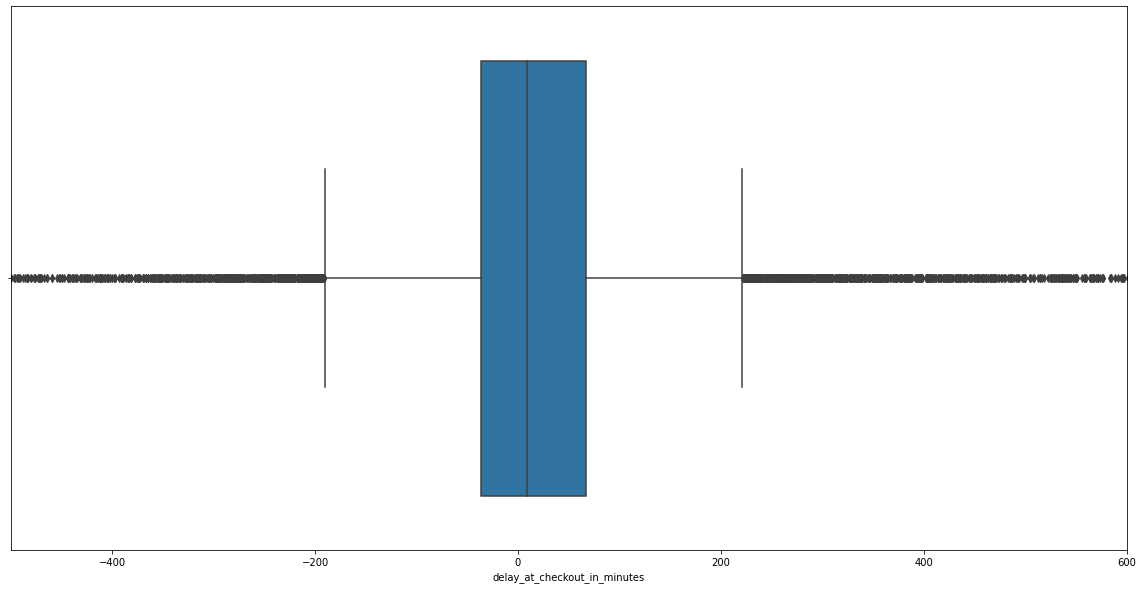

In [12]:
fig, ax = plt.subplots(figsize=(20, 10))
plt.xlim(-500, 600)
sns.boxplot(data['delay_at_checkout_in_minutes'], ax=ax)

(-300.0, 1000.0)

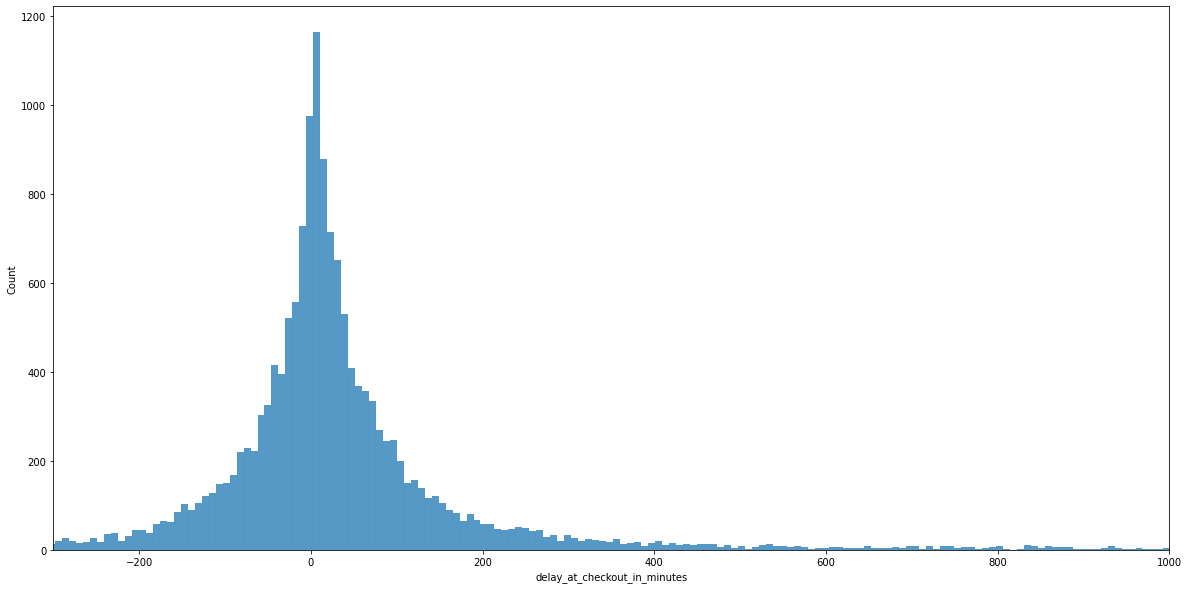

In [13]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.histplot(data=data, x=data['delay_at_checkout_in_minutes'])
plt.xlim(-300, 1000)


In [14]:
data_filtered = data[data['delay_at_checkout_in_minutes'] < 250]
data_filtered

,rental_id,car_id,instant_booking,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,delay_with_previous_rental_in_minutes
1,507750,269550,no,mobile,ended,-81.0,NaN,NaN
2,508131,359049,no,connect,ended,70.0,NaN,NaN
5,511626,398802,no,mobile,ended,-203.0,NaN,NaN
6,511639,370585,no,connect,ended,-15.0,563782.0,570.0
7,512303,371242,no,mobile,ended,-44.0,NaN,NaN
...,...,...,...,...,...,...,...,...
21304,573322,376491,yes,connect,ended,-66.0,NaN,NaN
21306,573790,341965,no,mobile,ended,-337.0,NaN,NaN
21307,573791,364890,no,mobile,ended,144.0,NaN,NaN
21308,574852,362531,no,connect,ended,-76.0,NaN,NaN


Percentage of rentals that have delay at checkout above 250 min of all rentals

In [15]:
pencentage_more_250 = 1 - (len(data_filtered)/len(data))
pencentage_more_250

0.16508728179551124

### Problematic drivers: the ones that have delay at their checkout

Without filtering:

In [16]:
drivers_late = data[data['delay_at_checkout_in_minutes']>0]
drivers_late = len(drivers_late)
drivers_late

9404

Percentage of rentals with delay


In [17]:
percentage_drivers_late = data[data['delay_at_checkout_in_minutes']>0]
percent = len(percentage_drivers_late)/len(data)
percent

0.5211415904682738

Percentage of rentals with delay dropping outliers


In [18]:
percentage_drivers_late = data_filtered[data_filtered['delay_at_checkout_in_minutes']>0]
percent = len(percentage_drivers_late)/len(data_filtered)
percent

0.5392937740607991

#### Average delay at checkout (filtering outliers)

In [19]:
average_delay = data_filtered[['delay_at_checkout_in_minutes']]
average_delay.dropna()
average_delay = average_delay[average_delay['delay_at_checkout_in_minutes']>0]
average_delay = average_delay.sum()/len(data_filtered)
average_delay

delay_at_checkout_in_minutes    32.766494
dtype: float64

#### Average delay at checkout (not filtering outliers)

In [20]:
average_delay = data[['delay_at_checkout_in_minutes']]
average_delay.dropna()
average_delay = average_delay[average_delay['delay_at_checkout_in_minutes']>0]
average_delay = average_delay.sum()/len(data)
average_delay

delay_at_checkout_in_minutes    105.161929
dtype: float64

#### In which case do we found more delay at checkout?

In [21]:
data.checkin_type.value_counts()

mobile     14536
connect     3509
Name: checkin_type, dtype: int64

In [22]:
data.instant_booking.value_counts()

no     16716
yes     1329
Name: instant_booking, dtype: int64

In [23]:
data[data['delay_at_checkout_in_minutes'] > 0].checkin_type.value_counts()

mobile     7945
connect    1459
Name: checkin_type, dtype: int64

In [24]:
data[data['delay_at_checkout_in_minutes'] > 0].instant_booking.value_counts()

no     8868
yes     536
Name: instant_booking, dtype: int64

### ●  How many rentals would be affected by the feature depending on the threshold and scope chosen?

Affected rentals would be the ones that have a delay with previous rental lower than the threshold set.

In [25]:
data_close_previous = data[data['delay_with_previous_rental_in_minutes'].isnull() == False]
data_close_previous

,rental_id,car_id,instant_booking,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,delay_with_previous_rental_in_minutes
6,511639,370585,no,connect,ended,-15.0,563782.0,570.0
19,519491,312389,no,mobile,ended,58.0,545639.0,420.0
23,521156,392479,no,mobile,ended,NaN,537298.0,0.0
34,525044,349751,no,mobile,ended,NaN,510607.0,60.0
40,528808,181625,no,connect,ended,-76.0,557404.0,330.0
...,...,...,...,...,...,...,...,...
21253,573274,298117,yes,connect,ended,-7.0,571227.0,210.0
21266,567741,294059,no,mobile,ended,111.0,567708.0,120.0
21275,568523,297973,no,mobile,ended,12.0,567121.0,240.0
21286,569717,377312,no,mobile,ended,230.0,545045.0,90.0


In [26]:
total_connect = len(data[data['checkin_type'] == 'connect'])
total_connect

3509

In [27]:
total_booking = len(data[data['instant_booking'] == 'yes'])
total_booking

1329

In [28]:
total_mobile = len(data[data['checkin_type'] == 'mobile'])
total_mobile

14536

In [54]:
def affected_rentals(threshold):
    affected = data[['delay_with_previous_rental_in_minutes']].dropna()
    affected = affected[affected['delay_with_previous_rental_in_minutes'] < threshold]
    return len(affected)/len(data)

def affected_rentals_instant_booking(threshold):
    affected_booking = data[data['instant_booking'] == 'yes']
    affected_booking = affected_booking[['delay_with_previous_rental_in_minutes']].dropna()
    affected_booking = affected_booking[affected_booking['delay_with_previous_rental_in_minutes'] < threshold]
    return len(affected_booking)/total_booking


def checkout_time_connect(threshold):
    affected_booking = data[data['checkin_type'] == 'connect']
    affected_booking = affected_booking[['delay_with_previous_rental_in_minutes']].dropna()
    affected_booking = affected_booking[affected_booking['delay_with_previous_rental_in_minutes'] < threshold]
    return len(affected_booking)/total_connect

def checkout_time_mobile(threshold):
    affected_booking = data[data['checkin_type'] == 'mobile']
    affected_booking = affected_booking[['delay_with_previous_rental_in_minutes']].dropna()
    affected_booking = affected_booking[affected_booking['delay_with_previous_rental_in_minutes'] < threshold]
    return len(affected_booking)/total_mobile

In [55]:
x_list = np.arange(0,800,1)
y_list_all = []

for x in x_list:
    y_list_all.append(affected_rentals(x))

y_list_booking = []

for x in x_list:
    y_list_booking.append(affected_rentals_instant_booking(x))
    
y_list_connect = []

for x in x_list:
    y_list_connect.append(checkout_time_connect(x))
    
y_list_mobile = []

for x in x_list:
    y_list_mobile.append(checkout_time_mobile(x))


(0.0, 0.3)

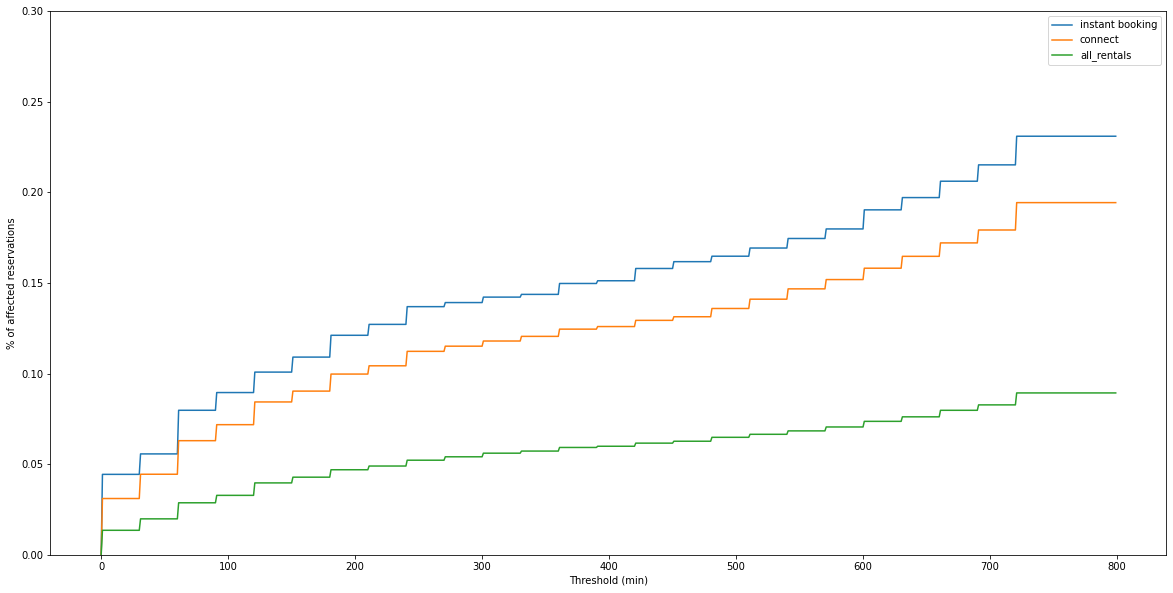

In [59]:
ax = fig.add_subplot(1, 1, 1)
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(x_list, y_list_booking)
ax.plot(x_list, y_list_connect)
# ax.plot(x_list, y_list_mobile)
ax.plot(x_list, y_list_all)
ax.set_xlabel('Threshold (min)')
ax.set_ylabel('% of affected reservations')
labels = ['instant booking', 'connect', 'all_rentals', 'mobile']
ax.legend(labels)
plt.ylim(0, 0.3)



#### Let's see the relation between the delay at checkout of a rental and the time remaining with the next rental

In [32]:
df = pd.read_csv('rentals_with_next.csv')
df.drop(columns = 'Unnamed: 0', inplace=True)
df

,rental_id,car_id,instant_booking,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,delay_with_previous_rental_in_minutes,time_between_checkout_previous_and_checkin_next
0,563782,370585,no,connect,ended,136.0,NaN,NaN,570.0
1,545639,312389,no,mobile,ended,140.0,NaN,NaN,420.0
2,537298,392479,no,mobile,ended,0.0,NaN,NaN,0.0
3,510607,349751,no,mobile,ended,-113.0,NaN,NaN,60.0
4,557404,181625,yes,connect,ended,-352.0,554077.0,120.0,330.0
...,...,...,...,...,...,...,...,...,...
1836,562174,381499,yes,connect,ended,73.0,NaN,NaN,0.0
1837,566136,396409,no,mobile,ended,16.0,NaN,NaN,570.0
1838,567121,297973,no,mobile,ended,-275.0,NaN,NaN,240.0
1839,545045,377312,no,mobile,ended,22.0,563963.0,630.0,90.0


In [33]:
df['difference_of_checkout_checkin'] = df['time_between_checkout_previous_and_checkin_next'] - df['delay_at_checkout_in_minutes']
df

,rental_id,car_id,instant_booking,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,delay_with_previous_rental_in_minutes,time_between_checkout_previous_and_checkin_next,difference_of_checkout_checkin
0,563782,370585,no,connect,ended,136.0,NaN,NaN,570.0,434.0
1,545639,312389,no,mobile,ended,140.0,NaN,NaN,420.0,280.0
2,537298,392479,no,mobile,ended,0.0,NaN,NaN,0.0,0.0
3,510607,349751,no,mobile,ended,-113.0,NaN,NaN,60.0,173.0
4,557404,181625,yes,connect,ended,-352.0,554077.0,120.0,330.0,682.0
...,...,...,...,...,...,...,...,...,...,...
1836,562174,381499,yes,connect,ended,73.0,NaN,NaN,0.0,-73.0
1837,566136,396409,no,mobile,ended,16.0,NaN,NaN,570.0,554.0
1838,567121,297973,no,mobile,ended,-275.0,NaN,NaN,240.0,515.0
1839,545045,377312,no,mobile,ended,22.0,563963.0,630.0,90.0,68.0


In [34]:
df[df['difference_of_checkout_checkin'] < 0].head(50)

,rental_id,car_id,instant_booking,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,delay_with_previous_rental_in_minutes,time_between_checkout_previous_and_checkin_next,difference_of_checkout_checkin
11,539751,374684,no,mobile,ended,3.0,537514.0,660.0,0.0,-3.0
12,540607,382364,no,mobile,ended,1.0,NaN,NaN,0.0,-1.0
37,540868,408776,no,mobile,ended,26.0,NaN,NaN,0.0,-26.0
64,572909,301512,no,mobile,ended,13.0,NaN,NaN,0.0,-13.0
68,533413,353425,yes,connect,ended,4.0,NaN,NaN,0.0,-4.0
69,541519,408821,no,mobile,ended,95.0,NaN,NaN,90.0,-5.0
88,536978,378931,no,mobile,ended,271.0,NaN,NaN,60.0,-211.0
93,514474,376574,no,mobile,ended,81.0,NaN,NaN,0.0,-81.0
122,548646,282893,no,mobile,ended,201.0,NaN,NaN,30.0,-171.0
128,548169,375834,no,mobile,ended,5.0,NaN,NaN,0.0,-5.0


In [35]:
problematic_cases = len(df[df['difference_of_checkout_checkin'] < 0])
problematic_cases

219

In [36]:
percentage_problem_cases = problematic_cases / len(data)
percentage_problem_cases

0.012136325852036575

In [37]:
df[df['difference_of_checkout_checkin'] < 0].checkin_type.value_counts()

mobile     148
connect     71
Name: checkin_type, dtype: int64

In [38]:
df[df['difference_of_checkout_checkin'] < 0].instant_booking.value_counts()

no     185
yes     34
Name: instant_booking, dtype: int64

### ● How many problematic cases will it solve depending on the threshold and the scope?

In [39]:
df[df['difference_of_checkout_checkin'] < 0]

,rental_id,car_id,instant_booking,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,delay_with_previous_rental_in_minutes,time_between_checkout_previous_and_checkin_next,difference_of_checkout_checkin
11,539751,374684,no,mobile,ended,3.0,537514.0,660.0,0.0,-3.0
12,540607,382364,no,mobile,ended,1.0,NaN,NaN,0.0,-1.0
37,540868,408776,no,mobile,ended,26.0,NaN,NaN,0.0,-26.0
64,572909,301512,no,mobile,ended,13.0,NaN,NaN,0.0,-13.0
68,533413,353425,yes,connect,ended,4.0,NaN,NaN,0.0,-4.0
...,...,...,...,...,...,...,...,...,...,...
1806,550186,410402,no,mobile,ended,21.0,NaN,NaN,0.0,-21.0
1812,534678,383344,no,connect,ended,164.0,563620.0,240.0,60.0,-104.0
1823,564756,378689,no,mobile,ended,39.0,NaN,NaN,0.0,-39.0
1835,567708,294059,no,mobile,ended,283.0,NaN,NaN,120.0,-163.0


In [40]:
df[df['difference_of_checkout_checkin'] < 0].instant_booking.value_counts()

no     185
yes     34
Name: instant_booking, dtype: int64

In [41]:
df[df['difference_of_checkout_checkin'] < 0].checkin_type.value_counts()

mobile     148
connect     71
Name: checkin_type, dtype: int64

In [42]:
solved_cases = df[df['difference_of_checkout_checkin'] < 0]
len(solved_cases)

219

In [43]:
solved_booking_total = df[df['difference_of_checkout_checkin'] < 0]
solved_booking_total = solved_booking_total[solved_booking_total['instant_booking'] == 'yes']
solved_booking_total = len(solved_booking_total)
solved_booking_total

34

In [44]:
solved_connect_total = df[df['difference_of_checkout_checkin'] < 0]
solved_connect_total = solved_connect_total[solved_connect_total['checkin_type'] == 'connect']
solved_connect_total = len(solved_connect_total)
solved_connect_total

71

In [45]:
solved_mobile_total = df[df['difference_of_checkout_checkin'] < 0]
solved_mobile_total = solved_mobile_total[solved_mobile_total['checkin_type'] == 'mobile']
solved_mobile_total = len(solved_mobile_total)
solved_mobile_total

148

In [46]:
solved_cases = df[df['difference_of_checkout_checkin'] < 0]
solved_cases = solved_cases[solved_cases['instant_booking'] == 'yes']
solved_cases = solved_cases[solved_cases['delay_at_checkout_in_minutes'] < 100]
len(solved_cases)

26

In [47]:
def cases_solved(threshold):
    solved_cases = df[df['difference_of_checkout_checkin'] < 0]
    solved_cases = solved_cases[solved_cases['delay_at_checkout_in_minutes'] < threshold]
    return len(solved_cases)/problematic_cases

def cases_solved_booking(threshold):
    solved_cases = df[df['difference_of_checkout_checkin'] < 0]
    solved_cases = solved_cases[solved_cases['instant_booking'] == 'yes']
    solved_cases = solved_cases[solved_cases['delay_at_checkout_in_minutes'] < threshold]
    return len(solved_cases)/solved_booking_total


def cases_solved_connect(threshold):
    solved_cases = df[df['difference_of_checkout_checkin'] < 0]
    solved_cases = solved_cases[solved_cases['checkin_type'] == 'connect']
    solved_cases = solved_cases[solved_cases['delay_at_checkout_in_minutes'] < threshold]
    return len(solved_cases)/solved_connect_total

def cases_solved_mobile(threshold):
    solved_cases = df[df['difference_of_checkout_checkin'] < 0]
    solved_cases = solved_cases[solved_cases['checkin_type'] == 'mobile']
    solved_cases = solved_cases[solved_cases['delay_at_checkout_in_minutes'] < threshold]
    return len(solved_cases)/solved_mobile_total

x_list_solved = np.arange(0,800,1)
y_list_solved = []

for x in x_list_solved:
    y_list_solved.append(cases_solved(x))

y_list_solved_booking = []

for x in x_list_solved:
    y_list_solved_booking.append(cases_solved_booking(x))
    
y_list_solved_connect = []

for x in x_list_solved:
    y_list_solved_connect.append(cases_solved_connect(x))
    
y_list_solved_mobile = []

    
for x in x_list_solved:
    y_list_solved_mobile.append(cases_solved_mobile(x))

(0.0, 1.2)

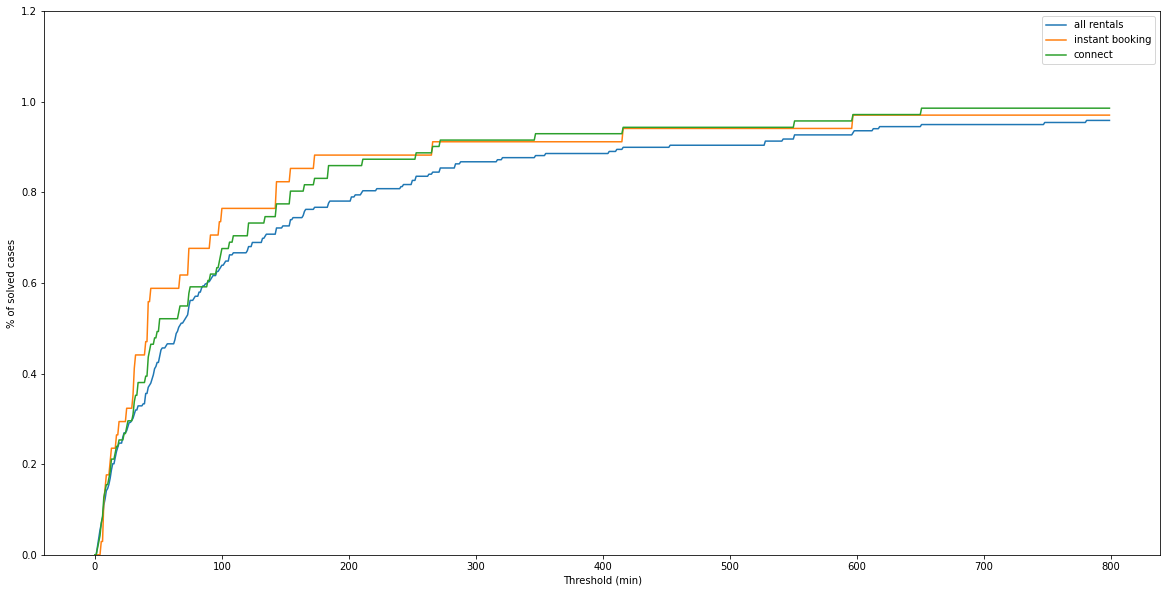

In [48]:
ax = fig.add_subplot(1, 1, 1)
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(x_list_solved, y_list_solved)
ax.plot(x_list_solved, y_list_solved_booking)
ax.plot(x_list_solved, y_list_solved_connect)
# ax.plot(x_list_solved, y_list_solved_mobile)
labels = ['all rentals', 'instant booking', 'connect', 'mobile']
ax.legend(labels)
ax.set_xlabel('Threshold (min)')
ax.set_ylabel('% of solved cases')
plt.ylim(0, 1.2)